In [6]:
#import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

Instructions for updating:
non-resource variables are not supported in the long term


In [26]:
learning_rate = 0.01
epochs = 200

In [8]:
n_samples = 30
train_x = np.linspace(0, 20, n_samples)
train_y = 3 * train_x + 4 * np.random.randn(n_samples)

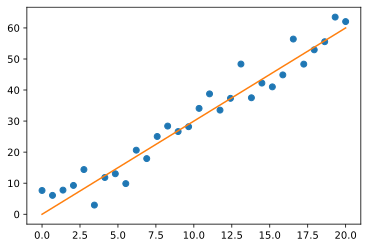

In [9]:
plt.plot(train_x, train_y, 'o')
plt.plot(train_x, 3 * train_x)
plt.show()

y=3x 의 선으로 가상의 라인을 대략 그려본다.

In [14]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name='weights')
B = tf.Variable(np.random.randn(), name='bias')

In [16]:
pred = X * W + B
# pred = tf.add(tf.multiply(X, W), B)

In [19]:
cost = tf.reduce_sum((pred - Y) ** 2) / (2 * n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [20]:
init = tf.global_variables_initializer()

epoch: 0000 c=62.6186 w=2.1916 b=-0.4928
epoch: 0020 c=8.8497 w=3.0772 b=-0.3189
epoch: 0040 c=8.8044 w=3.0711 b=-0.2256
epoch: 0060 c=8.7636 w=3.0654 b=-0.1371
epoch: 0080 c=8.7269 w=3.0600 b=-0.0530
epoch: 0100 c=8.6939 w=3.0549 b=0.0268
epoch: 0120 c=8.6641 w=3.0500 b=0.1025
epoch: 0140 c=8.6373 w=3.0454 b=0.1744
epoch: 0160 c=8.6132 w=3.0410 b=0.2426
epoch: 0180 c=8.5915 w=3.0368 b=0.3074


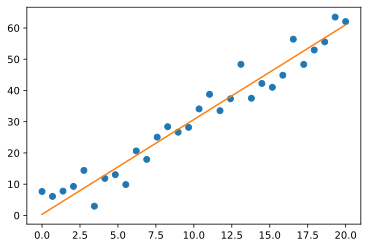

In [27]:
with tf.Session() as sesh:
    sesh.run(init)
    
    for epoch in range(epochs):
        for x, y in zip(train_x, train_y):
            sesh.run(optimizer, feed_dict={X: x, Y: y})
            
        if not epoch % 20:
            c = sesh.run(cost, feed_dict={X: train_x, Y: train_y})
            w = sesh.run(W)
            b = sesh.run(B)
            print(f'epoch: {epoch:04d} c={c:.4f} w={w:.4f} b={b:.4f}')
            
    weight = sesh.run(W)
    bias = sesh.run(B)
    plt.plot(train_x, train_y, 'o')
    plt.plot(train_x, weight * train_x + bias)
    plt.show()

- 결론
```
y=3.0368 x + 0.3074 의 1차 방정식이 만들어 졌다.
```